In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

# Initialization


In [2]:
# Was lui en had geen zin in een if of for
def plot_dens3(x):
  plt.hist(hist, color = ['b', 'r', 'y'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

def plot_dens2(x):
  plt.hist(hist, color = ['b', 'r'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of X and Y density')
  plt.xlabel('Binned values of X and Y')
  plt.ylabel('Amount')

def plot_dens1(x):
  plt.hist(hist, color = ['b'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

In [3]:
A = np.array([[250.25, -249.75],[ -249.75, 250.25]])

def gaussian(mu = 0, sigma = 1):
  return np.random.normal(mu, sigma, 2)

# x' interperted as x transposed
def p_dens(x):
  E = 1/2 * np.dot(np.transpose(x),np.dot(A,x))
  return np.exp(-E)

def accept(a):
  if np.isnan(a):
    return 0
  return np.random.binomial(1, min(a,1))

# Metropalis Hasting

In [4]:
def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x, y)
  plt.show()

def metropalis_hasting(steps, sigma, grid = False):
  rejections = 0
  x_hist = []
  init_x = gaussian(sigma)
  x = init_x
  for i in range(steps):
    x_new = gaussian(x, 0.1)
    a = p_dens(x_new)/p_dens(x) 
    if accept(a) == 1:
      x = x_new
      x_hist.append(x)
    else:
      rejections += 1
      x_hist.append(x)
  if grid:
    plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

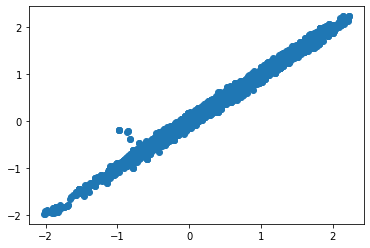

Rejections: 5445
[[-0.97459017 -0.19464668]
 [-0.97459017 -0.19464668]
 [-0.97459017 -0.19464668]
 ...
 [ 0.04100864 -0.09072662]
 [ 0.04100864 -0.09072662]
 [-0.00213666 -0.05068686]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


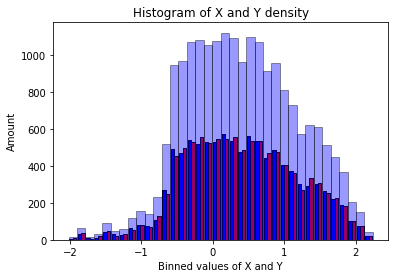

In [5]:
rejections, hist = metropalis_hasting(10000, 0.1, True)
print("Rejections: {}".format(rejections))
print(hist)

plot_dens2(hist)

# Hamilton Monte Carlo

In [6]:
def Energy(x):
  return 1/2 * np.dot(np.transpose(x),np.dot(A,x))

def gradientE(x):
  g=np.array([x[0]*250.25-249.75*x[1],x[1]*250.25-249.75*x[0]])
  return g

def hamilton_monte_carlo(steps, tau, epsilon, sigmav, grid = False):
  x = gaussian(sigma = sigmav)
  x_hist = np.array([])
  g = gradientE(x)
  E = Energy(x)
  rejections=0

  for l in range(steps):
    p = np.random.normal(0, 1, len(x))
    H = np.dot(np.transpose(p), p) / 2 + Energy(x)
    xnew = x
    gnew = g

    for s in range(tau):
      p = p - epsilon * gnew /2
      xnew = xnew + epsilon * p #!!!!!!!!!!!!!! += caused the error DO NOT USE
      gnew = gradientE(xnew)
      p = p - epsilon * gnew /2
    
    Enew = Energy(xnew)
    Hnew = np.dot(np.transpose(p), p) /2 + Enew
    dH = Hnew - H

    accept = False
    if dH < 0: 
      accept = True
    elif np.random.uniform(0,1) < np.exp(-dH):
      accept = True
    else:
      accept = False
    if accept:
      g = gnew
      x = xnew
      E = Enew
    else:
      rejections+=1

    x_hist = np.append(x_hist, x)
  if grid:
    plot_scatter(np.array(np.split(x_hist, steps)))
  return rejections, np.array(np.split(x_hist, steps))

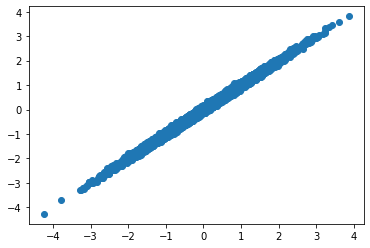

Rejections: 12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


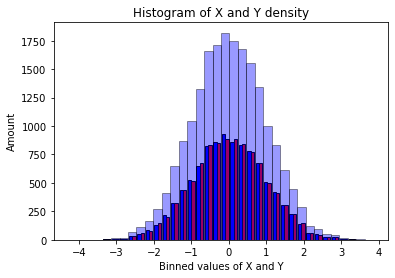

In [7]:
rejections, hist = hamilton_monte_carlo(10000,100,0.01,0.1, True)
print("Rejections: {}".format(rejections))
# print(hist)
plot_dens2(hist)

In [ ]:
def plot_metropalis_to_img(X, steps, sigma):
  x = []
  y = []
  
  for i in X:
    x.append(i[0])
    y.append(i[1])
  plt.ioff()
  plt.figure() 
  plt.title("Metropalis-Hasting steps: {}, sigma: {}".format(steps, sigma))
  plt.scatter(x, y)
  plt.savefig('Images/MH/Metropalis_Hasting_steps_{}_sigma_{}.png'.format(steps, sigma))

def plot_hamilton_to_img(X, steps, tau, epsilon, sigma):
  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])
  plt.ioff()
  plt.figure() 
  plt.title("Hamilton MC steps: {}, tau: {}, epsilon: {}, sigma: {}".format(steps, tau, epsilon, sigma))
  plt.scatter(x, y)
  plt.savefig('Images/MC/Hamilton_MC_steps_{}_tau_{}_epsilon_{}_sigma_{}.png'.format(steps, tau, epsilon, sigma))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


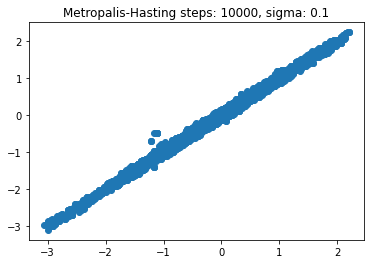

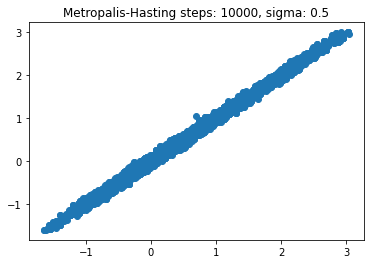

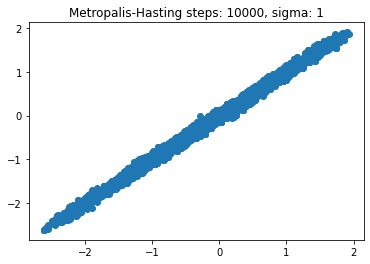

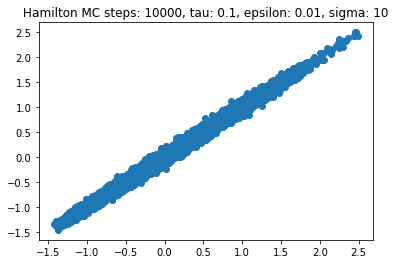

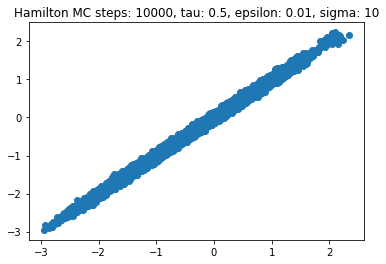

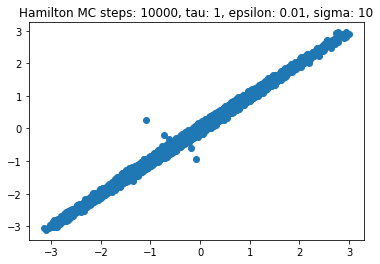

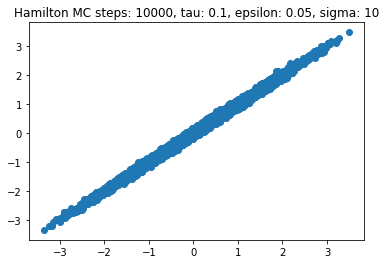

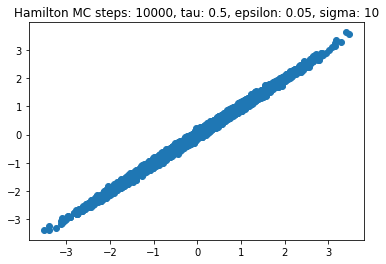

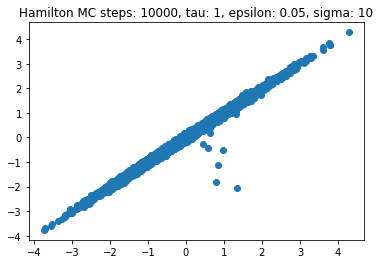

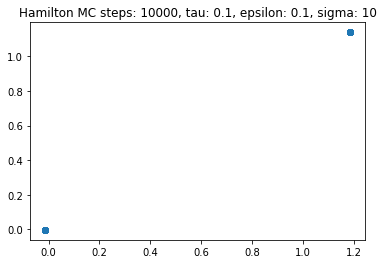

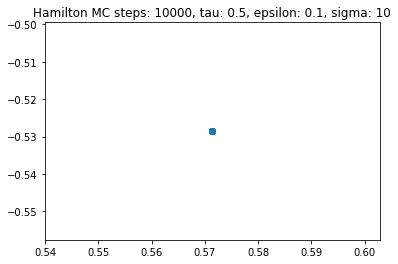

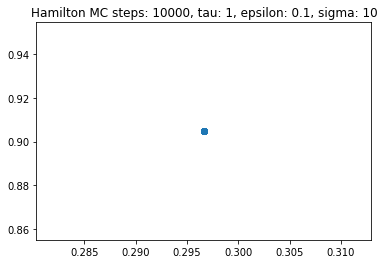

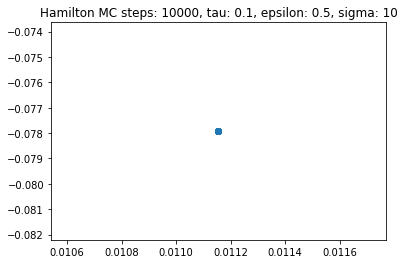

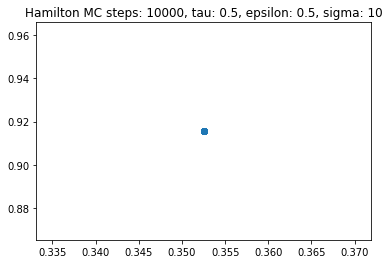

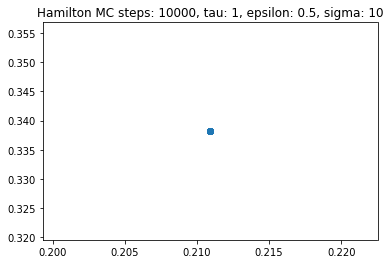

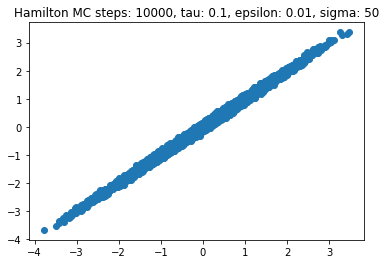

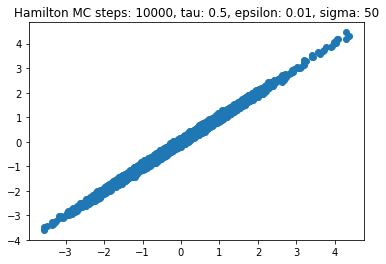

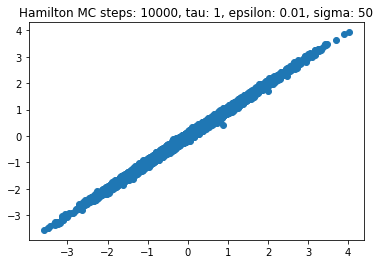

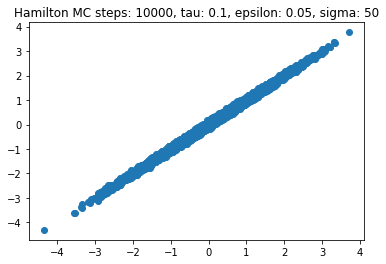

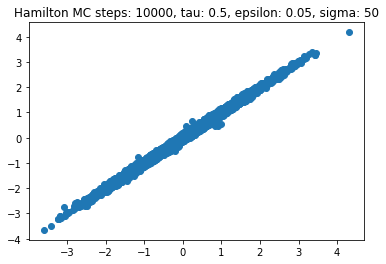

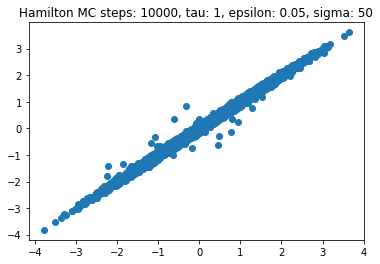

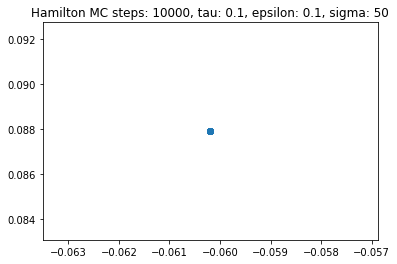

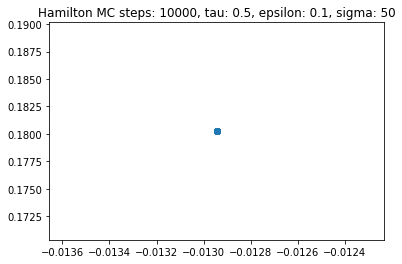

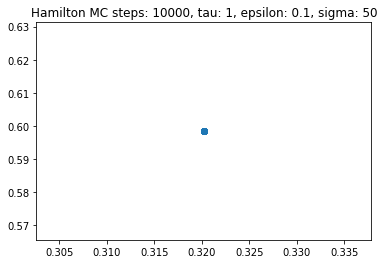

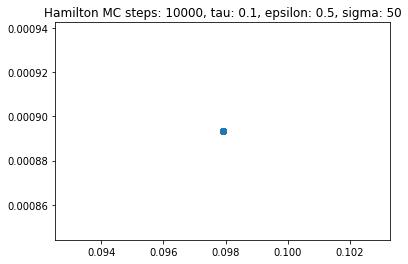

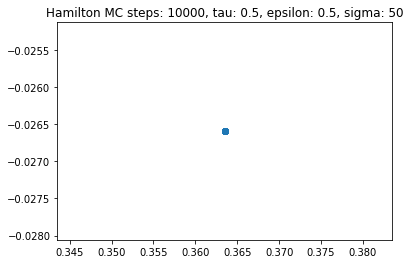

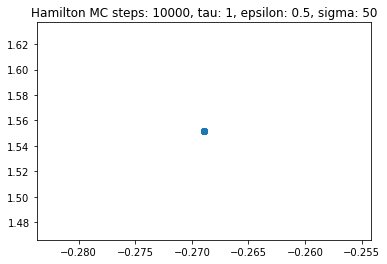

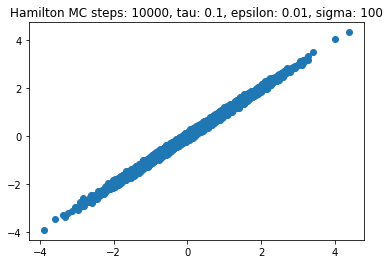

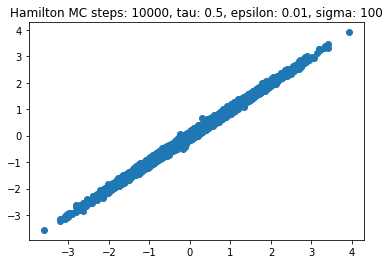

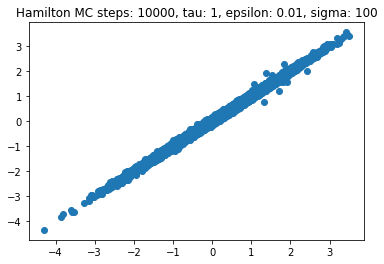

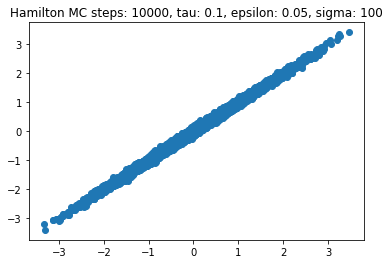

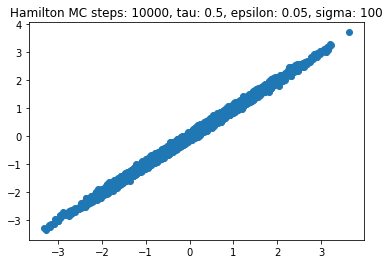

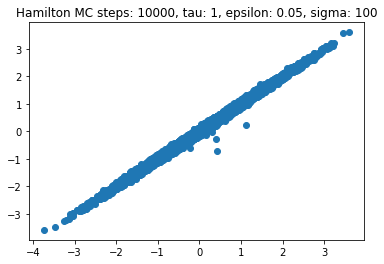

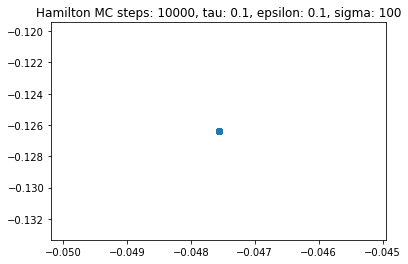

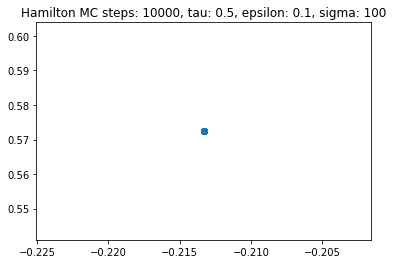

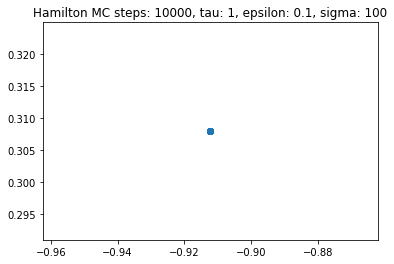

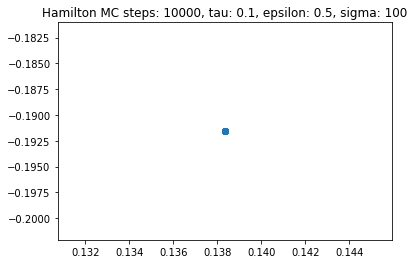

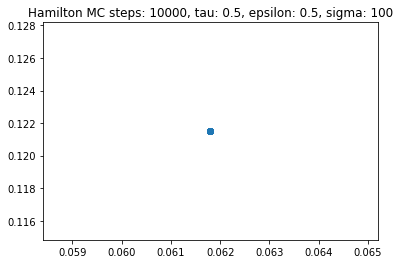

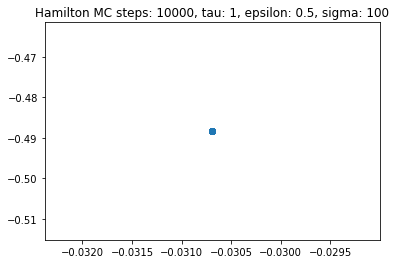

In [ ]:
steps = [10000]
sigma = [0.1, 0.5, 1]
epsilon = [0.01, 0.05, 0.1, 0.5]
tau = [10, 50, 100]

dictMH = list( {} for i in range(len(steps)* len(sigma)) )
MH_counter = 0
for step in steps:
  for s in sigma:
    rejections, hist = metropalis_hasting(step, s)
    dictMH[MH_counter]["rejections"] = rejections
    dictMH[MH_counter]["step"] = step
    dictMH[MH_counter]["sigma"] = s
    dictMH[MH_counter]["hist"] = hist
    dictMH[MH_counter]["ratio"] = rejections/step
    MH_counter += 1

    plot_metropalis_to_img(hist, step, s)

dictHMC = list({} for i in range(len(steps)* len(sigma) * len(epsilon) * len(tau)))
HMC_counter = 0
for step in steps:
  for frogStep in tau:
    for e in epsilon:
      for s in sigma:
        rejections, hist = hamilton_monte_carlo(step, frogStep, e, s)
        dictHMC[HMC_counter]["rejections"] = rejections
        dictHMC[HMC_counter]["step"] = step
        dictHMC[HMC_counter]["sigma"] = s
        dictHMC[HMC_counter]["epsilon"] = e
        dictHMC[HMC_counter]["tau"] = frogStep
        dictHMC[HMC_counter]["hist"] = hist
        dictHMC[HMC_counter]["ratio"] = rejections/step

        HMC_counter += 1
        plot_hamilton_to_img(hist, step, frogStep, e, s)

In [ ]:
minMH = min(dictMH, key=lambda x:x['ratio'])
maxMH = max(dictMH, key=lambda x:x['ratio'])
print(minMH)
for i in dictMH:  
  print(i['rejections'])

minHMC = min(dictHMC, key=lambda x:x['ratio'])
maxHMC = max(dictHMC, key=lambda x:x['ratio'])
print(minHMC)
# print(maxHMC)
print(minMH)
for i in dictHMC:  
  print("Rejections: {}, epsilon: {}, sigma: {}, tau: {}".format(i['rejections'],i['epsilon'],i['sigma'],i['tau']))

{'rejections': 5389, 'step': 10000, 'sigma': 0.1, 'hist': array([[-1.17175566, -0.50076697],
       [-1.11979523, -0.49503636],
       [-1.10939779, -0.49952088],
       ...,
       [ 1.23260105,  1.2439243 ],
       [ 1.23260105,  1.2439243 ],
       [ 1.11486486,  1.10710561]]), 'ratio': 0.5389}
5389
5448
5441
{'rejections': 13, 'step': 10000, 'sigma': 0.5, 'epsilon': 0.01, 'tau': 100, 'hist': array([[-0.15926377, -0.49274442],
       [ 0.30973811,  0.65213891],
       [-0.12483389, -0.43967372],
       ...,
       [-0.07581928, -0.13261709],
       [ 0.48114283,  0.5315402 ],
       [ 0.02453293, -0.04049387]]), 'ratio': 0.0013}
{'rejections': 5389, 'step': 10000, 'sigma': 0.1, 'hist': array([[-1.17175566, -0.50076697],
       [-1.11979523, -0.49503636],
       [-1.10939779, -0.49952088],
       ...,
       [ 1.23260105,  1.2439243 ],
       [ 1.23260105,  1.2439243 ],
       [ 1.11486486,  1.10710561]]), 'ratio': 0.5389}
Rejections: 43, epsilon: 0.01, sigma: 0.1, tau: 10
Rejections